### Моделирование по колебаниям: "Выпрямление с фильтрацией"

##### Петренко Людмила, Кусайкина Елизавета М3104

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from celluloid import Camera

#### Описание работы:
Выпрямление - способ получения постоянного тока, например, для питания радиотехнических устройств.

Объект выпрямления - электрическое напряжение переменного тока.

Цель фильтрации при выпрямлении - ослабить переменную составляющую выпрямленного напряжения.

В этой работе требовалось cмоделировать работу фильтравыпрямителя. На входе фильтра действует напряжение E(t) одно- или двухполупериодное, полученное из переменного синусоидального напряжения. Для ослабления переменной составляющей в схеме фильтра имеется реактивный элемент: конденсатор емкостью С. Фильтр работает на нагрузку сопротивлением Rн.

![alt text](straightening_schem.png "Title")

Выходное, выпряпленное напряжение можно рассчитать с помощью дифференциального уравнения, описывающего работу фильтра:

$\displaystyle \frac{\partial u(t)}{\partial t}$ = $\frac{1}{rC} $ [$E(t) $ - (1 + $\frac{r}{R} $) $u(t) $]

$u(0) = 0$ - начальное условие

Решим задачу Коши:

<blockquote> 1. Решаем соответствующее однородное уравнение как уравнение с разделяющимися переменными

Пусть $w = $ - $\frac{1}{rC} $ - $\frac{1}{RC} $

$\displaystyle \frac{\partial u(t)}{\partial t}$ + $wu(t) $ = 0 <=> $\int_{}^{} \frac{1}{u} \; du = \int_{}^{} wdt $ <=> $u = c(t)e^{wt}$
</blockquote>

<blockquote> 2. Подставляем результат в исходное неоднородное, находим c(t)

$c(t) $ = $\int_{}^{} \frac{E(t)}{e^{wt}rC} \; dt $

</blockquote>

<blockquote> 3. В зависимости от функции E(t) получаем

Для E_one - однополупериодное выпрямленное напряжение, $E(t) = |\sin(t)| $

$c(t) $ = $\int_{}^{} \frac{|\sin(t)|}{e^{wt}rC} \; dt $
</blockquote>

При $\sin(t) > 0 $ :

$c(t) $ = $\int_{}^{} \frac{\sin(t)}{e^{wt}rC} \; dt $ = -$\frac{w}{rC}\sin(t)e^{-wt} $ + $\frac{w}{rC}\int_{}^{} e^{-wt}\cos(t) \; dt $ = -$\frac{w}{rC}\sin(t)e^{-wt} $ - $\frac{w^{2}}{rC}\cos(t)e^{-wt} $ - $\frac{w^{2}}{rC}\int_{}^{} e^{-wt}\sin(t) \; dt $ 

=> $(1 + w^{2})\int_{}^{} \frac{|\sin(t)|}{e^{wt}rC} \; dt $ = -$\frac{w}{rC}\sin(t)e^{-wt} $ - $\frac{w^{2}}{rC}\cos(t)e^{-wt} $

=> $c(t) $ = - $\frac{1}{(1 + w^{2})rC}\left(\sin(t)we^{-wt} + \cos(t)w^{2}e^{-wt}\right) $ + const



При $\sin(t) \le 0 $ :

$c(t) $ = - $\int_{}^{} \frac{\sin(t)}{e^{wt}rC} \; dt $ = $\frac{w}{rC}\sin(t)e^{-wt} $ - $\frac{w}{rC}\int_{}^{} e^{-wt}\cos(t) \; dt $ = $\frac{w}{rC}\sin(t)e^{-wt} $ + $\frac{w^{2}}{rC}\cos(t)e^{-wt} $ + $\frac{w^{2}}{rC}\int_{}^{} e^{-wt}\sin(t) \; dt $ 

=> $(- 1 - w^{2})\int_{}^{} \frac{|\sin(t)|}{e^{wt}rC} \; dt $ = $\frac{w}{rC}\sin(t)e^{-wt} $ + $\frac{w^{2}}{rC}\cos(t)e^{-wt} $

=> $c(t) $ = $\frac{1}{(1 + w^{2})rC}\left(\sin(t)we^{-wt} + \cos(t)w^{2}e^{-wt}\right) $ + const


> Для E_two - двухполупериодное выпрямленное напряжение, $E(t) = \sin(t) $, при $\sin(t) > 0 $ иначе $E(t) = 0 $

При $\sin(t) > 0 $ :

$c(t) $ = $\int_{}^{} \frac{\sin(t)}{e^{wt}rC} \; dt $ = -$\frac{w}{rC}\sin(t)e^{-wt} $ + $\frac{w}{rC}\int_{}^{} e^{-wt}\cos(t) \; dt $ = -$\frac{w}{rC}\sin(t)e^{-wt} $ - $\frac{w^{2}}{rC}\cos(t)e^{-wt} $ - $\frac{w^{2}}{rC}\int_{}^{} e^{-wt}\sin(t) \; dt $ 

=> $(1 + w^{2})\int_{}^{} \frac{|\sin(t)|}{e^{wt}rC} \; dt $ = -$\frac{w}{rC}\sin(t)e^{-wt} $ - $\frac{w^{2}}{rC}\cos(t)e^{-wt} $

=> $c(t) $ = - $\frac{1}{(1 + w^{2})rC}\left(\sin(t)we^{-wt} + \cos(t)w^{2}e^{-wt}\right) $ + const

При $\sin(t) \le 0 $ : 

$c(t) = 0 $ 

> 4. Находим const из начальных условий

$\sin(t) > 0 $ :

$u(0) = \left(- \frac{1}{(1 + w^{2})rC} \left(\sin(0)we^{0} + \cos(0)w^{2}e^{0}\right)  + const\right)e^{0} $ = $- \frac{w^{2}}{(1 + w^{2})rC} + const $ = 0 => $const = \frac{w^{2}}{(1 + w^{2})rC} $

E_one,  $\sin(t) \le 0 $ :

$const = - \frac{w^{2}}{(1 + w^{2})rC} $

> 5. Получили общее решение

$\sin(t) > 0 $ :

$u(t) = \left(- \frac{1}{(1 + w^{2})rC} \left(\sin(t)we^{-wt} + \cos(t)w^{2}e^{-wt}\right)  + \frac{w^{2}}{(1 + w^{2})rC}\right)e^{wt} $

E_one,  $\sin(t) \le 0 $ :

$u(t) = \left(\frac{1}{(1 + w^{2})rC} \left(\sin(t)we^{-wt} + \cos(t)w^{2}e^{-wt}\right)  - \frac{w^{2}}{(1 + w^{2})rC}\right)e^{wt} $

E_two,  $\sin(t) \le 0 $ :

$u(t) = 0 $

Зададим параметры фильтра:

In [94]:
r = 0.1 # Внутреннее сопротивление источника напряжения
R = 10 # Сопротивление нагрузки
C = 1 # Емкость конденсатора

In [99]:
w = (-1/r*C - 1/C*R)
def u(t):
    return np.exp(w*t)*(w**2/(r*C*(1 + w**2))) - (np.sin(t)*w*np.exp(-w*t) + np.cos(t)*(w*w)*np.exp(-w*t))*np.exp(w*t)*(1/(r*C*(1 + w*w)))
def u_(t):
    return - np.exp(w*t)*(w**2/(r*C*(1 + w**2))) + (np.sin(t)*w*np.exp(-w*t) + np.cos(t)*w*w*np.exp(-w*t))*np.exp(w*t)*(1/(r*C*(1 + w*w)))

nan
0.0


C:\Users\Администратор\AppData\Local\Temp\ipykernel_13100\962733837.py:3: RuntimeWarning: overflow encountered in exp
  return np.exp(w*t)*(w**2/(r*C*(1 + w**2))) - (np.sin(t)*w*np.exp(-w*t) + np.cos(t)*(w*w)*np.exp(-w*t))*np.exp(w*t)*(1/(r*C*(1 + w*w)))
C:\Users\Администратор\AppData\Local\Temp\ipykernel_13100\962733837.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(w*t)*(w**2/(r*C*(1 + w**2))) - (np.sin(t)*w*np.exp(-w*t) + np.cos(t)*(w*w)*np.exp(-w*t))*np.exp(w*t)*(1/(r*C*(1 + w*w)))


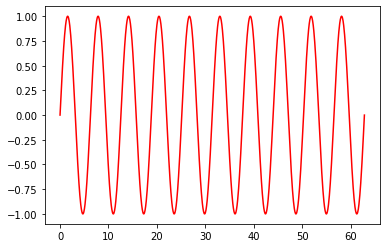

In [106]:
import math
def E_one_u(t):
    u_list = []
    for i in t:
        if np.sin(i) > 0:
            u_list.append(u(i))
        elif np.sin(i) <= 0:
            u_list.append(u_(i))
    return u_list

def E_one(t):
    return abs(np.sin(t))

def E_two_u(t):
    for i in t:
        if np.sin(i) > 0:
            return u(i)
        elif np.sin(i) <= 0:
            return 0

t = np.linspace(0, 20*np.pi, 1000)

print(u(1))
print(u(0))

plt.plot(t, E_one(t), color='red', label="U(t)")

C:\Users\Администратор\AppData\Local\Temp\ipykernel_13100\962733837.py:3: RuntimeWarning: overflow encountered in exp
  return np.exp(w*t)*(w**2/(r*C*(1 + w**2))) - (np.sin(t)*w*np.exp(-w*t) + np.cos(t)*(w*w)*np.exp(-w*t))*np.exp(w*t)*(1/(r*C*(1 + w*w)))
C:\Users\Администратор\AppData\Local\Temp\ipykernel_13100\962733837.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(w*t)*(w**2/(r*C*(1 + w**2))) - (np.sin(t)*w*np.exp(-w*t) + np.cos(t)*(w*w)*np.exp(-w*t))*np.exp(w*t)*(1/(r*C*(1 + w*w)))
C:\Users\Администратор\AppData\Local\Temp\ipykernel_13100\962733837.py:5: RuntimeWarning: overflow encountered in exp
  return - np.exp(w*t)*(w**2/(r*C*(1 + w**2))) + (np.sin(t)*w*np.exp(-w*t) + np.cos(t)*w*w*np.exp(-w*t))*np.exp(w*t)*(1/(r*C*(1 + w*w)))
C:\Users\Администратор\AppData\Local\Temp\ipykernel_13100\962733837.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return - np.exp(w*t)*(w**2/(r*C*(1 + w**2))) + (np.sin(t)*w*np.exp(-w*t) + np.cos(t

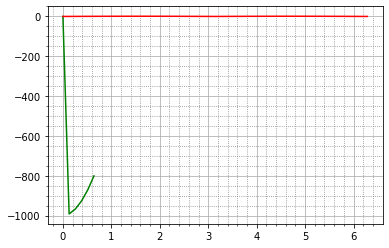

In [101]:
plt.minorticks_on()
plt.grid(True, which='both')
plt.grid(which='minor', color='gray', linestyle=':')
plt.plot(t, E_one_u(t), color='green', label="U(t)")
plt.plot(t, E_one(t), color='red', label="U(t)")